In [1]:
import torch
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
torch.manual_seed(2017)

In [3]:
with open('data.txt','r') as f:
    data_list = [i.split('\n')[0].split(',') for i in f.readlines()]
    data = [(float(i[0]), float(i[1]), float(i[2])) for i in data_list]
data_list

[['34.62365962451697', '78.0246928153624', '0'],
 ['30.28671076822607', '43.89499752400101', '0'],
 ['35.84740876993872', '72.90219802708364', '0'],
 ['60.18259938620976', '86.30855209546826', '1'],
 ['79.0327360507101', '75.3443764369103', '1'],
 ['45.08327747668339', '56.3163717815305', '0'],
 ['61.10666453684766', '96.51142588489624', '1'],
 ['75.02474556738889', '46.55401354116538', '1'],
 ['76.09878670226257', '87.42056971926803', '1'],
 ['84.43281996120035', '43.53339331072109', '1'],
 ['95.86155507093572', '38.22527805795094', '0'],
 ['75.01365838958247', '30.60326323428011', '0'],
 ['82.30705337399482', '76.48196330235604', '1'],
 ['69.36458875970939', '97.71869196188608', '1'],
 ['39.53833914367223', '76.03681085115882', '0'],
 ['53.9710521485623', '89.20735013750205', '1'],
 ['69.07014406283025', '52.74046973016765', '1'],
 ['67.94685547711617', '46.67857410673128', '0'],
 ['70.66150955499435', '92.92713789364831', '1'],
 ['76.97878372747498', '47.57596364975532', '1'],
 ['67

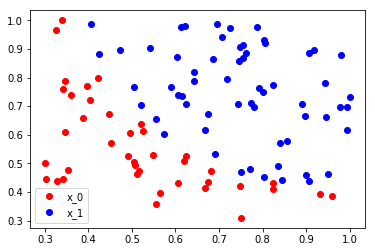

In [4]:
x0_max = max([i[0] for i in data])
x1_max = max([i[1] for i in data])
data = [(i[0]/x0_max, i[1]/x1_max, i[2]) for i in data]

x0 = list(filter(lambda x : x[-1] == 0.0, data))
x1 = list(filter(lambda x : x[-1] == 1.0, data))

plot_x0 = [i[0] for i in x0]
plot_y0 = [i[1] for i in x0]
plot_x1 = [i[0] for i in x1]
plot_y1 = [i[1] for i in x1]

plt.plot(plot_x0, plot_y0, 'ro', label="x_0")
plt.plot(plot_x1, plot_y1, 'bo', label="x_1")
plt.legend(loc="best")

In [5]:
np_data = np.array(data, dtype='float32')
x_data = torch.from_numpy(np_data[:,0:2])
y_data = torch.from_numpy(np_data[:,-1]).unsqueeze(1)

In [6]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

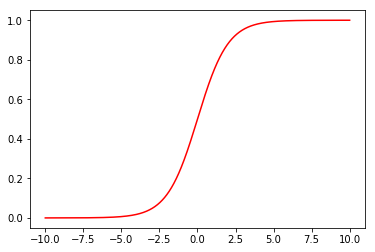

In [7]:
plot_x = np.arange(-10, 10.01, 0.01)
plot_y = sigmoid(plot_x)

plt.plot(plot_x, plot_y, 'r')

In [8]:
x_data = Variable(x_data)
y_data = Variable(y_data)

In [9]:
import torch.nn.functional as F

In [10]:
w = Variable(torch.randn(2,1), requires_grad=True)
b = Variable(torch.randn(1), requires_grad=True)

def logistic_regression(x):
    return F.sigmoid(torch.mm(x, w) + b)

<class 'numpy.ndarray'>


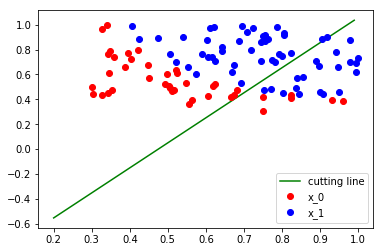

In [11]:
w0 = w[0].data[0].numpy()
w1 = w[1].data[0].numpy()
b0 = b.data[0].numpy()

print(type(w0))
plot_x = np.arange(0.2, 1, 0.01)
plot_y = (-w0 * plot_x - b0) / w1

plt.plot(plot_x, plot_y, 'g', label='cutting line')
plt.plot(plot_x0, plot_y0, 'ro', label='x_0')
plt.plot(plot_x1, plot_y1, 'bo', label='x_1')
plt.legend(loc='best')

In [12]:
def binary_loss(y_pred, y):
    logits = (y * y_pred.clamp(1e-12).log() + (1 - y) * (1 - y_pred).clamp(1e-12).log()).mean()
    return -logits

In [13]:
y_pred = logistic_regression(x_data)
loss = binary_loss(y_pred, y_data)
print(loss)

G:\Anaconda3\envs\pytorch\lib\site-packages\torch\nn\functional.py:1006: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


tensor(0.6999, grad_fn=<NegBackward>)


In [14]:
loss.backward()
w.data = w.data - 0.1 * w.grad.data
b.data = b.data - 0.1 * b.grad.data

y_pred = logistic_regression(x_data)
loss = binary_loss(y_pred, y_data)
print(loss)

tensor(0.6914, grad_fn=<NegBackward>)


In [15]:
from torch import nn
w = nn.Parameter(torch.randn(2,1))
b = nn.Parameter(torch.randn(1))

def logistic_regression(x):
    return F.sigmoid(torch.mm(x, w) + b)

optimizer = torch.optim.SGD([w,b], lr=1)

In [16]:
import time

start = time.time()

for e in range(1000):
    y_pred = logistic_regression(x_data)
    loss = binary_loss(y_pred, y_data)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    mask = y_pred.ge(0.5).float()
    acc = (mask == y_data).sum().data[0] / y_data.shape[0]
    
    if(e + 1) % 200 == 0:
        print('epoch:{}, Loss:{:.5f}, Acc:{:.5f}'.format(e+1, loss.data[0], acc))
during = time.time() - start

print()

print('During Time:{:.3f} s'.format(during))

G:\Anaconda3\envs\pytorch\lib\site-packages\ipykernel_launcher.py:14: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  
G:\Anaconda3\envs\pytorch\lib\site-packages\ipykernel_launcher.py:17: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


epoch:200, Loss:0.39672, Acc:0.00000
epoch:400, Loss:0.32464, Acc:0.00000
epoch:600, Loss:0.29070, Acc:0.00000
epoch:800, Loss:0.27080, Acc:0.00000
epoch:1000, Loss:0.25767, Acc:0.00000

During Time:1.831 s


<class 'numpy.ndarray'>


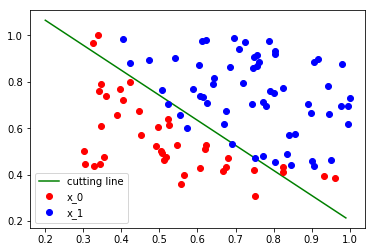

In [18]:
w0 = w[0].data[0].numpy()
w1 = w[1].data[0].numpy()
b0 = b.data[0].numpy()

print(type(w0))
plot_x = np.arange(0.2, 1, 0.01)
plot_y = (-w0 * plot_x - b0) / w1

plt.plot(plot_x, plot_y, 'g', label='cutting line')
plt.plot(plot_x0, plot_y0, 'ro', label='x_0')
plt.plot(plot_x1, plot_y1, 'bo', label='x_1')
plt.legend(loc='best')